In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [45]:
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt, pandas as pd, scipy, numpy as np,  seaborn as sns, sklearn

In [18]:
from datasets import load_dataset
import pandas as pd
import numpy as np

df = load_dataset('jonasmaltebecker/synthetic_drilling_dataset')
df = pd.DataFrame(df['train'])

Generating train split:   0%|          | 0/27393 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3913 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7827 [00:00<?, ? examples/s]

In [19]:
df.head()

,torque_m_c,feed,cutting_speed,depth,k_wear,drill_no
0,"[0.0, 0.0, 0.0, 0.0, 1.8458523750305176, 1.845...",0.142528,90.828499,26.142727,1.049230,0.0
1,"[0.0, 0.0, 0.0, 0.0, 2.1615500450134277, 2.161...",0.142528,90.828499,26.142727,1.228681,3.0
2,"[0.0, 0.0, 0.0, 0.0, 1.9420154094696045, 1.942...",0.142528,90.828499,26.142727,1.103892,6.0
3,"[0.0, 0.0, 0.0, 0.0, 1.796998381614685, 1.7969...",0.142528,90.828499,26.142727,1.021460,9.0
4,"[0.0, 0.0, 0.0, 0.0, 1.2383015155792236, 1.238...",0.142528,90.828499,26.142727,0.703883,12.0


In [20]:
data = pd.DataFrame()

In [21]:
for col in df.select_dtypes(include=['int','float']).columns:
    data[col] = df[col]

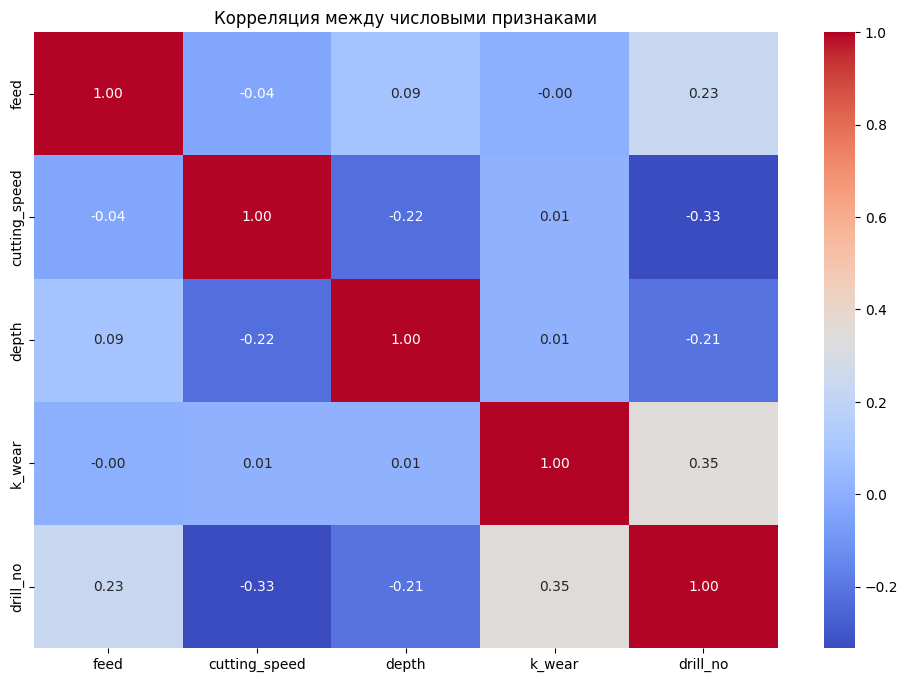

In [22]:
df_corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()

In [32]:
correlation_matrix_no_diag = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

max_corr = correlation_matrix_no_diag.stack().idxmax()
min_corr = correlation_matrix_no_diag.stack().idxmin()
print(f'Maximum correlation is correlation between {max_corr} ,its value is {df_corr.loc[max_corr]}')
print(f'Minimum correlation is correlation between {min_corr} ,its value is {df_corr.loc[min_corr]}')

Maximum correlation is correlation between ('k_wear', 'drill_no') ,its value is 0.3464409201098617
Minimum correlation is correlation between ('cutting_speed', 'drill_no') ,its value is -0.33276381852524917


Text(0.5, 1.0, 'Диаграмма рассеяния: k_wear vs drill_no')

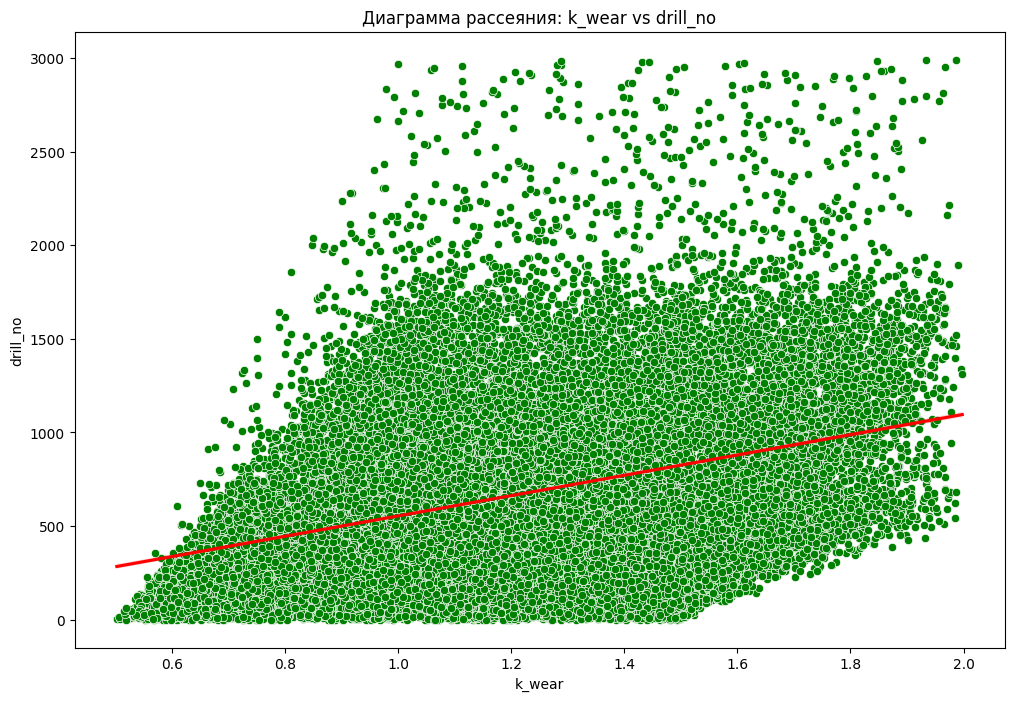

In [38]:
feature1, feature2 = max_corr

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[feature1], y=df[feature2],color = 'green')
sns.regplot(x=df[feature1], y=df[feature2], scatter=False, color='r')
plt.title(f'Диаграмма рассеяния: {feature1} vs {feature2}')


In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [41]:
data.describe()

,feed,cutting_speed,depth,k_wear,drill_no
count,27393.000000,27393.000000,27393.000000,27393.000000,27393.000000
mean,0.156479,96.762673,33.275102,1.250333,689.362720
std,0.027091,10.738720,8.433287,0.321878,504.105218
min,0.100118,80.552727,20.388262,0.502610,0.000000
25%,0.135965,88.167458,25.883728,0.998325,291.000000
50%,0.158231,94.462456,32.578053,1.251241,588.000000
75%,0.180836,103.658218,39.703590,1.499042,1002.000000
max,0.199395,119.985939,49.677711,1.997688,2991.000000


In [42]:
y = data['drill_no']
x = data.drop(columns = 'drill_no')

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(x_test)
errors = y_test - y_pred

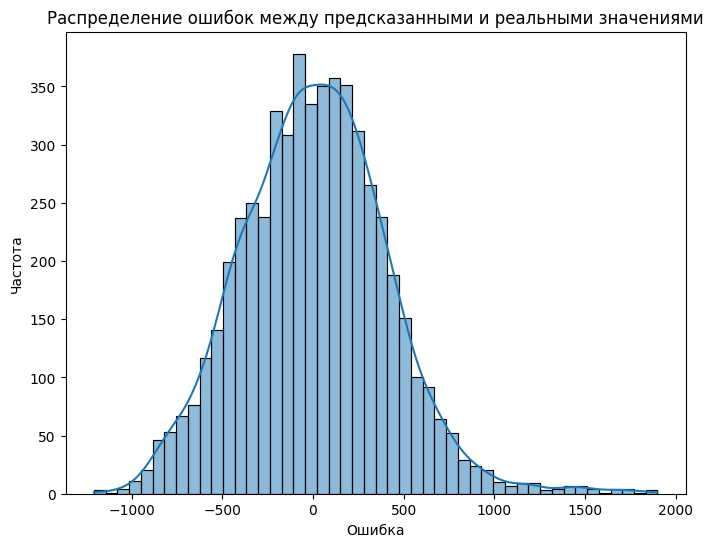

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=48, kde=True)
plt.title('Распределение ошибок между предсказанными и реальными значениями')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()

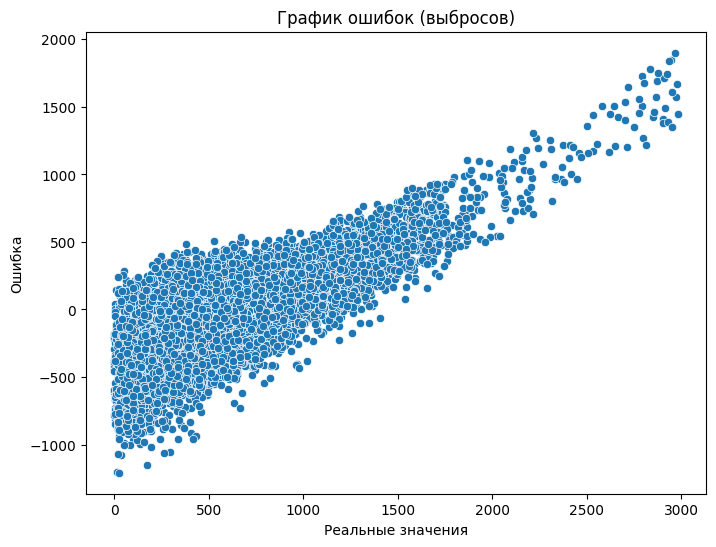

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=errors)
plt.title('График ошибок (выбросов)')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибка')
plt.show()